In [2]:
import pandas as pd
import json
import seaborn as sns

In [3]:
import warnings

warnings.simplefilter("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams

rcParams["figure.figsize"] = 8, 5

In [4]:
df = pd.read_csv('C:\\Users\\Семён\\Downloads\\us events ad_revenue filtered 03.02-07.02.csv')

In [5]:
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [6]:
df.city.nunique()

920

In [7]:
df.event_json.head()

0    {"ad_type":"banner","placement":"","view_index...
1    {"ad_type":"banner","placement":"","view_index...
2    {"ad_type":"banner","placement":"","view_index...
3    {"ad_type":"int","placement":"next_level","vie...
4    {"ad_type":"banner","placement":"","view_index...
Name: event_json, dtype: object

In [8]:
a = df.event_json.apply(json.loads).values.tolist() 
df_json = pd.DataFrame.from_records(a)

In [9]:
df_json.head(10)

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw
5,banner,,1,0,637797357542806540,27.75300,0.000494,0.061065,1.543673,1.543673,0.000494,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CKjDtPSh6_UCFV-DywEd7-gBAQ
6,banner,,1,0,637797357641550460,37.62716,0.002386,0.063451,1.627922,1.627922,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
7,banner,,1,0,637797357843375100,57.81027,0.000494,0.063945,1.514549,1.514549,0.000494,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CPTz84Ki6_UCFUp2wQodL68LZw
8,banner,,1,0,637797357941529010,67.62502,0.002386,0.066332,1.601711,1.601711,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-57
9,banner,,1,0,637797358143310010,87.80360,0.000494,0.066826,1.490959,1.490959,0.000494,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,COaY9ZCi6_UCFRN3wQodXY4GCg


In [10]:
new_df = pd.merge(df, df_json, left_index=True, right_index=True)

In [11]:
new_df.ad_type.value_counts()

banner    815984
int        37613
rv          6482
Name: ad_type, dtype: int64

In [12]:
df_banner = new_df[new_df.ad_type == 'banner']

In [13]:
df_banner.shape

(815984, 33)

In [14]:
df_int = new_df[new_df.ad_type == 'int']

In [15]:
df_int.shape

(37613, 33)

In [16]:
df_rv = new_df[new_df.ad_type == 'rv']

In [17]:
df_rv.shape

(6482, 33)

# Анализ формата рекламы: Banner


### Средние ecpm по юзерам


In [18]:
df_banner_by_id = df_banner.groupby('profile_id', as_index=False).mean()
df_banner_by_id['ecpm'] = df_banner_by_id['revenue'] * 1000
df_banner_by_id.head()

,profile_id,event_timestamp,event_receive_timestamp,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,ecpm
0,JL00qCZH1HV,1.643941e+09,1.643941e+09,1.0,0.0,6.377952e+17,104.512035,0.003184,0.100435,5.379373,5.379373,0.003184,3.183940
1,JL015rw9vmN,1.644024e+09,1.644024e+09,1.0,0.0,6.377960e+17,12727.693788,0.001161,0.704756,1.208829,1.208829,0.001161,1.160748
2,JL01aCdFTJy,1.644162e+09,1.644162e+09,1.0,0.0,6.377974e+17,295.962714,0.000740,0.124575,0.644109,0.644109,0.000740,0.740097
3,JL04ODuw9UP,1.643856e+09,1.643856e+09,1.0,0.0,6.377943e+17,696.615081,0.000213,0.710068,0.210804,0.210804,0.000213,0.213227
4,JL06OWhBYxn,1.644161e+09,1.644161e+09,1.0,0.0,6.377973e+17,107.699927,0.000468,0.047982,0.332892,0.332892,0.000468,0.468146


No handles with labels found to put in legend.


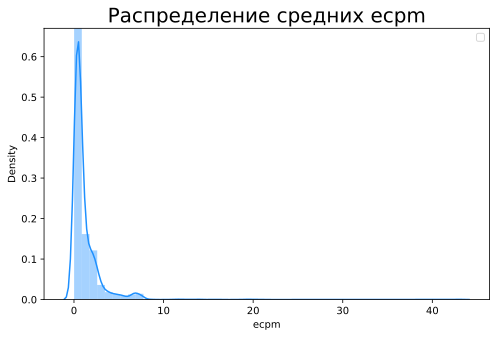

In [71]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df_banner_by_id.ecpm, color="dodgerblue")
plt.ylim(0, 0.67)
plt.title('Распределение средних ecpm', fontsize=20)
plt.legend()
plt.show()

(0.0, 45.0)

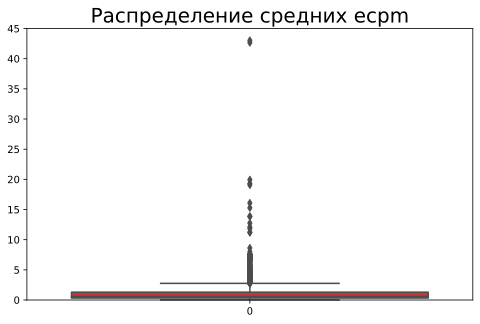

In [75]:
sns.boxplot(data=df_banner_by_id.ecpm, palette='Set1')
plt.title('Распределение средних ecpm', fontsize=20)
plt.ylim(0, 45)

### Средние ecpm по городам

In [21]:
df_banner_by_city = df_banner.groupby('city', as_index=False).mean()
df_banner_by_city['ecpm'] = df_banner_by_city['revenue'] * 1000
df_banner_by_city.shape

(856, 13)

Text(0.5, 1.0, 'Распределение средних по городу ecpm ')

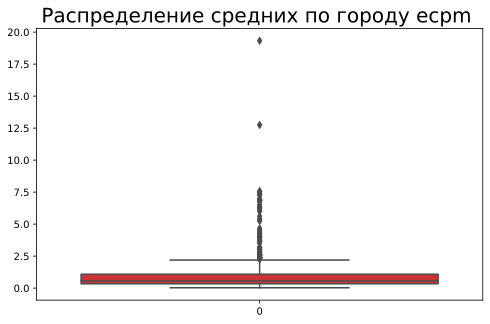

In [22]:
sns.boxplot(data=df_banner_by_city.ecpm, palette='Set1')
plt.title('Распределение средних по городу ecpm ', fontsize=20)

#### Если посмотреть на города с максимальным средним ecpm, то на первых двух местах будут города с населением около 50 тыс. человек

In [179]:
df_banner_by_city[['city', 'ecpm']].sort_values(by='ecpm', ascending=False).head(20)

,city,ecpm
407,La Crosse,19.326435
529,Mountain View,12.750000
361,Huron,7.574941
423,Lawrenceville,7.519341
600,Oxnard,7.519341
154,Colchester,7.343538
166,Corbin,7.288381
143,Clarks Summit,7.266254
204,Dobson,6.987747
530,Muncie,6.929203


### Суммарное ecpm по городам

In [56]:
df_banner_by_city_sum = df_banner.groupby('city', as_index=False).sum()
df_banner_by_city_sum['ecpm'] = df_banner_by_city_sum['revenue'] * 1000
df_banner_by_city_sum.shape

(856, 13)

Text(0.5, 1.0, 'Распределение суммарных по городу ecpm ')

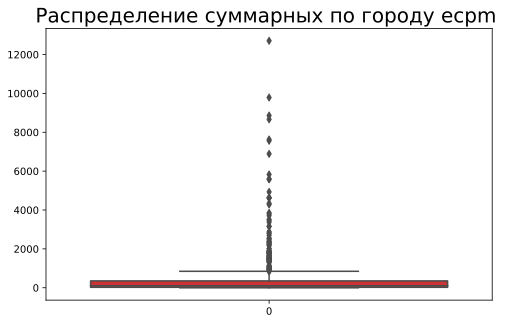

In [58]:
sns.boxplot(data=df_banner_by_city_sum.ecpm, palette='Set1')
plt.title('Распределение суммарных по городу ecpm ', fontsize=20)

In [84]:
df_banner_by_city_sum.ecpm.describe()

count      856.000000
mean       435.164015
std       1078.178256
min          0.030573
25%         23.070196
50%        102.468275
75%        353.010600
max      12708.616836
Name: ecpm, dtype: float64

No handles with labels found to put in legend.


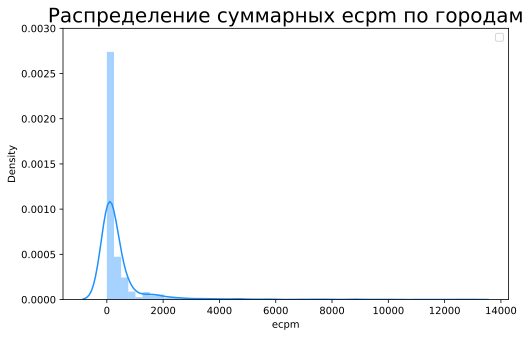

In [83]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df_banner_by_city_sum.ecpm, color="dodgerblue")
plt.ylim(0, 0.003)
plt.title('Распределение суммарных ecpm по городам', fontsize=20)
plt.legend()
plt.show()

#### Посмотрев максимальные ecpm по городам можем увидеть, что первое место занимает Нью Йорк с 8 миллионами населения, второе Индианаполис с 900 тыс. населения

#### Однако на 3 месте стоит Спокан с 200 тыс. населения, который обгоняет Хьюстон с 2.3 миллиона человек

#### Такие мегаполисы как Чикаго и Лос-Анжелес не в ходят даже в десятку


#### Такой маленький город как Tulsa (50 тыс. населения) имеет ecpm примерно как у 	San Francisco	

In [85]:
df_banner_by_city_sum[['city', 'ecpm']].sort_values(by='ecpm', ascending=False).head(30)

,city,ecpm
552,New York,12708.616836
366,Indianapolis,9789.214663
739,Spokane,8862.483820
355,Houston,8664.915809
510,Minneapolis,7629.354394
149,Cleveland,7564.766490
129,Charlotte,6888.516017
283,Gardena,5827.963081
184,Dallas,5592.234003
389,Kansas City,5582.027713


### Средние ecpm по версиям os

In [24]:
df_banner_by_os = df_banner.groupby('os_version', as_index=False).mean()
df_banner_by_os['ecpm'] = df_banner_by_os['revenue'] * 1000
df_banner_by_os.shape

(11, 13)

Text(0.5, 1.0, 'Зависимость среднего ecpm (banner) от версии системы')

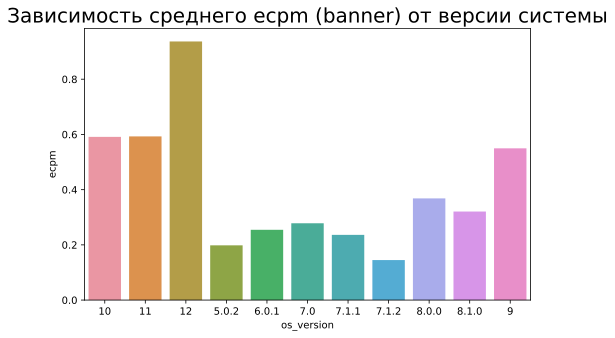

In [182]:
sns.barplot(x=df_banner_by_os.os_version.sort_values(ascending=True), y=df_banner_by_os.ecpm)
plt.title('Зависимость среднего ecpm (banner) от версии системы', fontsize=20)

Text(0.5, 1.0, 'Распределение средних ecpm по os')

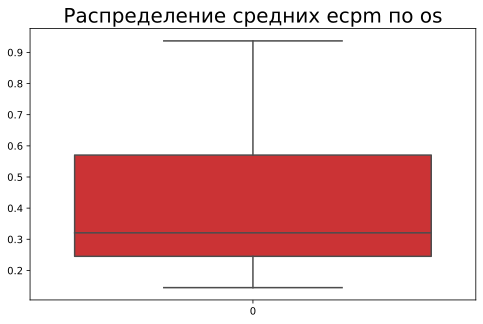

In [26]:
sns.boxplot(data=df_banner_by_os.ecpm, palette='Set1')
plt.title('Распределение средних ecpm по os', fontsize=20)

#### Если построить распределение количеcтва пользоватеей по os, можем увидеть, что картина соотносится с распределением ecpm


Text(0.5, 1.0, 'Количество пользователей os')

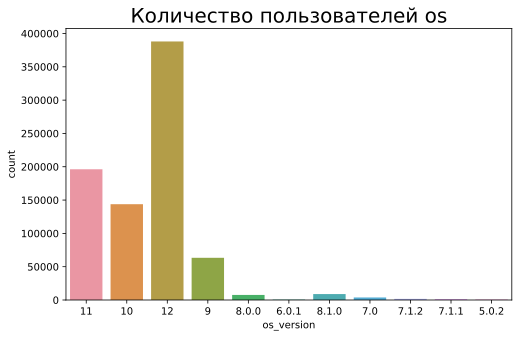

In [27]:
sns.countplot(x='os_version', data=df_banner)
plt.title('Количество пользователей os', fontsize=20)

### Суммарные ecpm по версии os

In [96]:
df_banner_by_os_sum = df_banner.groupby('os_version', as_index=False).sum()
df_banner_by_os_sum['ecpm'] = df_banner_by_os_sum['revenue'] * 1000
df_banner_by_os_sum.shape

(11, 13)

#### Не смотря на то, что среднии ecpm по 9, 10 и 11 версиям прмерно одинаковый, на графике суммарного ecpm можно увидеть, что 10 и 11 версии вносят примерно в два раза больше прибылы чем 9 версия

Text(0.5, 1.0, 'Зависимость суммарного ecpm от версии системы')

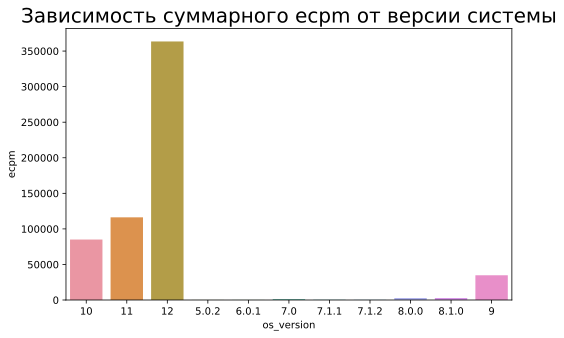

In [98]:
sns.barplot(x=df_banner_by_os_sum.os_version.sort_values(ascending=True), y=df_banner_by_os_sum.ecpm)
plt.title('Зависимость суммарного ecpm от версии системы', fontsize=20)

# Анализ формата рекламы: int

### Средние ecpm по юзерам


In [44]:
df_int_by_id = df_int.groupby('profile_id', as_index=False).mean()
df_int_by_id['ecpm'] = df_int_by_id['revenue'] * 1000
df_int_by_id.head()

,profile_id,event_timestamp,event_receive_timestamp,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,ecpm
0,JL015rw9vmN,1.644017e+09,1.644019e+09,11.888889,2.722222,6.377959e+17,23929.550009,0.021983,0.701494,30.450380,31.143465,0.021983,21.983199
1,JL01aCdFTJy,1.644162e+09,1.644162e+09,4.000000,1.000000,6.377974e+17,383.884700,0.011966,0.137238,36.256828,36.549221,0.011966,11.965651
2,JL04ODuw9UP,1.643856e+09,1.643856e+09,10.500000,1.500000,6.377943e+17,727.770200,0.023160,0.754766,36.490028,36.930372,0.023160,23.160000
3,JL06b4k4ygp,1.643989e+09,1.643989e+09,6.500000,1.000000,6.377957e+17,157.498855,0.007327,0.161001,11.786674,11.881729,0.007327,7.327454
4,JL06eD8uPpv,1.643854e+09,1.643854e+09,25.500000,1.500000,6.377942e+17,801.585250,0.044820,1.588492,32.222013,32.611441,0.044820,44.820000


No handles with labels found to put in legend.


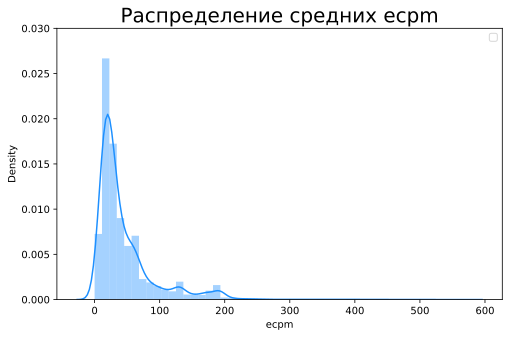

In [113]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df_int_by_id.ecpm, color="dodgerblue")
plt.ylim(0, 0.03)
plt.title('Распределение средних ecpm', fontsize=20)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Распределение средних ecpm')

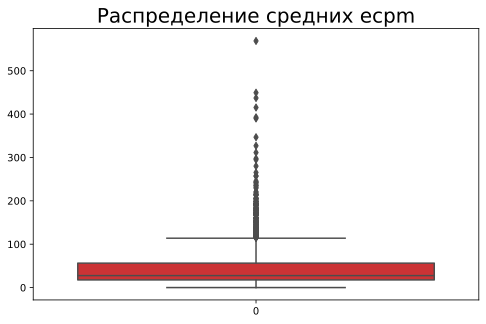

In [114]:
sns.boxplot(data=df_int_by_id.ecpm, palette='Set1')
plt.title('Распределение средних ecpm', fontsize=20)

### Средние ecpm по городам

In [115]:
df_int_by_city = df_int.groupby('city', as_index=False).mean()
df_int_by_city['ecpm'] = df_int_by_city['revenue'] * 1000
df_int_by_city.shape

(869, 13)

In [117]:
df_int_by_city.head()

,city,event_timestamp,event_receive_timestamp,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,ecpm
0,Aberdeen,1.644041e+09,1.644054e+09,13.666667,1.500000,6.377962e+17,377.411150,0.013583,0.341392,15.321452,15.508930,0.013583,13.583285
1,Abilene,1.644099e+09,1.644099e+09,2.875000,2.875000,6.377967e+17,3360.775025,0.050301,0.141891,53.737246,54.667110,0.050301,50.301282
2,Afton,1.644019e+09,1.644019e+09,13.000000,5.360000,6.377959e+17,3850.251261,0.029089,0.514350,33.802259,35.249553,0.029089,29.088757
3,Akron,1.644170e+09,1.644172e+09,79.115385,3.384615,6.377975e+17,1500.004050,0.064627,7.689009,64.687869,66.128658,0.064627,64.626718
4,Alameda,1.644115e+09,1.644115e+09,9.000000,1.000000,6.377968e+17,14362.450000,0.020145,0.748881,22.100685,22.278917,0.020145,20.145481


Text(0.5, 1.0, 'Распределение средних по городу ecpm ')

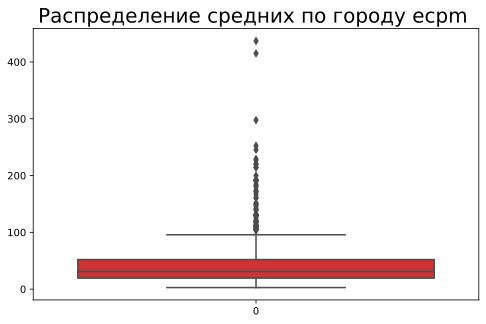

In [118]:
sns.boxplot(data=df_int_by_city.ecpm, palette='Set1')
plt.title('Распределение средних по городу ecpm ', fontsize=20)

#### Далее если посмотреть на города с максимальным средним ecpm мы увидим на первом месте Madisonville с населением 5 тыс. человек. На втором месте будет уже знакомый нам La Crosse

In [119]:
df_int_by_city[['city', 'ecpm']].sort_values(by='ecpm', ascending=False).head(30)

,city,ecpm
457,Madisonville,437.039882
399,La Crosse,415.159332
680,Rohnert Park,297.600000
538,Nashua,252.555569
569,Norwood,245.528961
746,Spirit Lake,229.195908
678,Rocky Mount,227.190990
598,Oxnard,221.145738
405,Lake Worth,219.315372
270,Fredericksburg,214.480240


### Суммарное ecpm по городам

In [120]:
df_int_by_city_sum = df_int.groupby('city', as_index=False).sum()
df_int_by_city_sum['ecpm'] = df_int_by_city_sum['revenue'] * 1000
df_int_by_city_sum.shape

(869, 13)

Text(0.5, 1.0, 'Распределение суммарных по городу ecpm ')

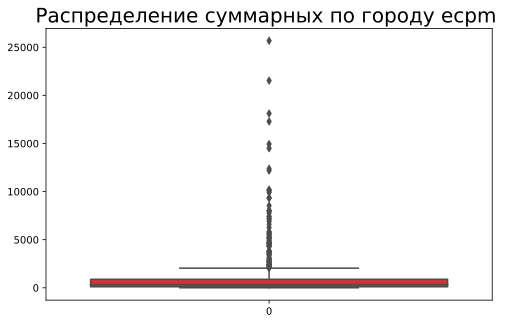

In [121]:
sns.boxplot(data=df_int_by_city_sum.ecpm, palette='Set1')
plt.title('Распределение суммарных по городу ecpm ', fontsize=20)

In [122]:
df_int_by_city_sum.ecpm.describe()

count      869.000000
mean       992.543075
std       2179.647267
min          2.890648
25%        105.105957
50%        318.777526
75%        884.545258
max      25674.272255
Name: ecpm, dtype: float64

No handles with labels found to put in legend.


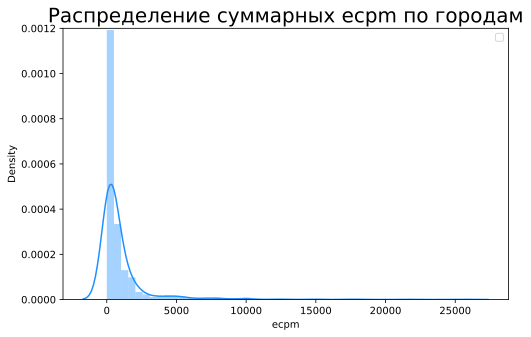

In [126]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df_int_by_city_sum.ecpm, color="dodgerblue")
plt.ylim(0, 0.0012)
plt.title('Распределение суммарных ecpm по городам', fontsize=20)
plt.legend()
plt.show()

#### Глядя на топ городов по суммарному ecpm как и в прошлом виде рекламы можно заметить такие крупные города как New York, Indianapolis, Houston, Los Angeles и т. д.

#### Однако можно так же опять заметить Spokane и Tulsa, которые принесли такой же доход как Detroit и Chicago

#### Еще одно интересное наблюдение Rocky Mount, которые приносит доход как Las Vegas

#### Bangor с населением 30 тыс. человек приносит больше чем Memphis (600 тыс. человек)

In [127]:
df_int_by_city_sum[['city', 'ecpm']].sort_values(by='ecpm', ascending=False).head(30)

,city,ecpm
550,New York,25674.272255
357,Indianapolis,21534.430700
152,Cleveland,18112.860745
506,Minneapolis,17286.339108
131,Charlotte,14940.738545
347,Houston,14497.605867
161,Columbus,12372.556946
449,Los Angeles,12181.896891
183,Dallas,10198.381386
142,Cincinnati,10133.484587


### Средние ecpm по версиям os

In [128]:
df_int_by_os = df_int.groupby('os_version', as_index=False).mean()
df_int_by_os['ecpm'] = df_int_by_os['revenue'] * 1000
df_int_by_os.shape

(11, 13)

#### На следующем графике можно увидеть интересную ососбенность.
#### Среднее ecpm по 7 версии больше чем у 9, 10 и 11 версий. И практически такой же как у 12 версии
#### Хотя количество пользователей на несколько порядков меньше

Text(0.5, 1.0, 'Зависимость среднего ecpm (int) от версии системы')

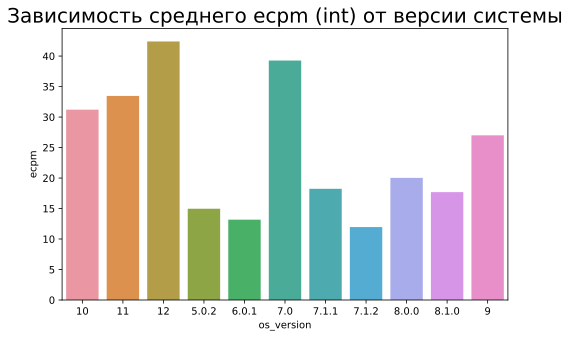

In [180]:
sns.barplot(x=df_int_by_os.os_version.sort_values(ascending=True), y=df_int_by_os.ecpm)
plt.title('Зависимость среднего ecpm (int) от версии системы', fontsize=20)

Text(0.5, 1.0, 'Количество пользователей os')

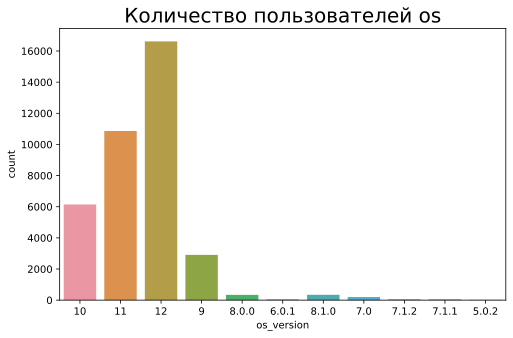

In [131]:
sns.countplot(x='os_version', data=df_int)
plt.title('Количество пользователей os', fontsize=20)

Text(0.5, 1.0, 'Распределение средних ecpm по os')

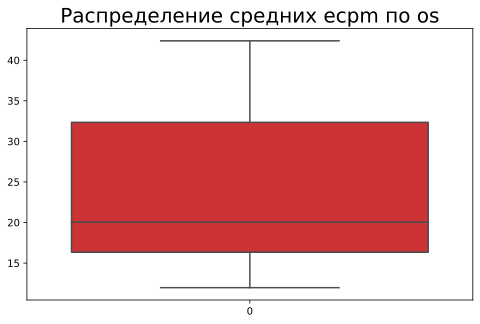

In [130]:
sns.boxplot(data=df_int_by_os.ecpm, palette='Set1')
plt.title('Распределение средних ecpm по os', fontsize=20)

### Суммарные ecpm по версии os

In [132]:
df_int_by_os_sum = df_int.groupby('os_version', as_index=False).sum()
df_int_by_os_sum['ecpm'] = df_int_by_os_sum['revenue'] * 1000
df_int_by_os_sum.shape

(11, 13)

#### На графике суммарного ecpm от версии системы ничего необычного: суммарный ecpm пропорционален количеству пользователей

Text(0.5, 1.0, 'Зависимость суммарного ecpm от версии системы')

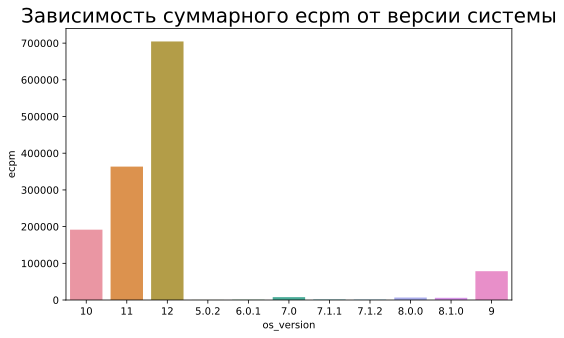

In [133]:
sns.barplot(x=df_int_by_os_sum.os_version.sort_values(ascending=True), y=df_int_by_os_sum.ecpm)
plt.title('Зависимость суммарного ecpm от версии системы', fontsize=20)

# Анализ формата рекламы: rv


### Средние ecpm по юзерам


In [134]:
df_rv_by_id = df_rv.groupby('profile_id', as_index=False).mean()
df_rv_by_id['ecpm'] = df_rv_by_id['revenue'] * 1000
df_rv_by_id.head()

,profile_id,event_timestamp,event_receive_timestamp,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,ecpm
0,JL04ODuw9UP,1.643856e+09,1.643856e+09,7.500000,1.500000,6.377943e+17,650.256650,0.080640,0.730470,54.252235,54.916929,0.080640,80.640000
1,JL06eD8uPpv,1.643854e+09,1.643854e+09,4.000000,1.000000,6.377942e+17,872.673200,0.211700,1.684085,122.395164,123.382225,0.211700,211.700000
2,JL0GsLmgQqj,1.644108e+09,1.644108e+09,3.000000,1.000000,6.377968e+17,304.632400,0.021516,0.348090,18.886984,19.039299,0.021516,21.516378
3,JL0aZ4tP8jc,1.643958e+09,1.643958e+09,23.851852,1.814815,6.377954e+17,1249.051636,0.019940,1.700110,22.715475,23.043731,0.019940,19.940048
4,JL0axMwodcw,1.643871e+09,1.643871e+09,2.500000,2.500000,6.377945e+17,597.574025,0.211700,0.776912,208.103504,212.355438,0.211700,211.700000


#### Заметим интересную особенность: выброс при значении ecpm около 200

No handles with labels found to put in legend.


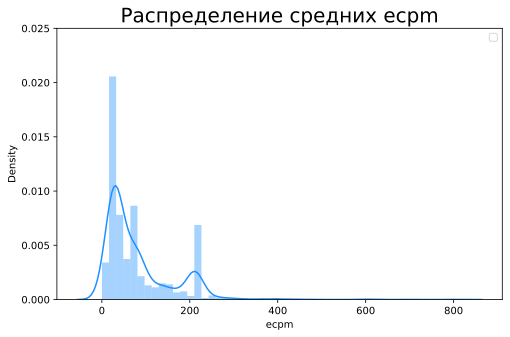

In [139]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df_rv_by_id.ecpm, color="dodgerblue")
plt.ylim(0, 0.025)
plt.title('Распределение средних ecpm', fontsize=20)
plt.legend()
plt.show()

(0.0, 900.0)

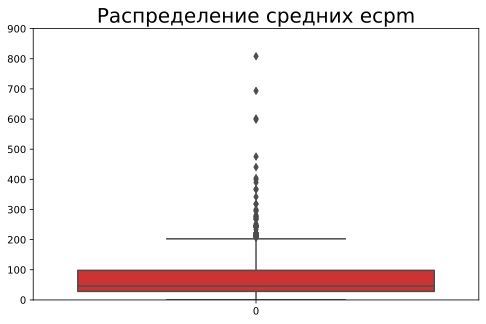

In [147]:
sns.boxplot(data=df_rv_by_id.ecpm, palette='Set1')
plt.title('Распределение средних ecpm', fontsize=20)
plt.ylim(0, 900)

### Средние ecpm по городам

In [148]:
df_rv_by_city = df_rv.groupby('city', as_index=False).mean()
df_rv_by_city['ecpm'] = df_rv_by_city['revenue'] * 1000
df_rv_by_city.shape

(454, 13)

Text(0.5, 1.0, 'Распределение средних по городу ecpm ')

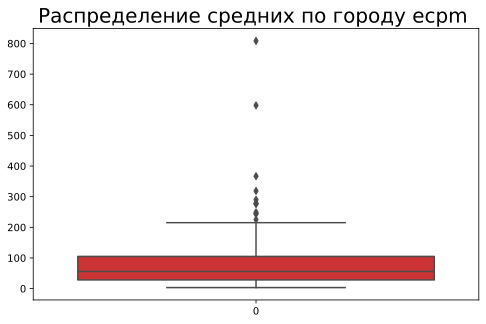

In [149]:
sns.boxplot(data=df_rv_by_city.ecpm, palette='Set1')
plt.title('Распределение средних по городу ecpm ', fontsize=20)

#### В этом формате рекламы в топе по среднему ecpm ни одного города больше 100 тыс. человек

#### Так же можно заметить 31 город со средним ecpm 211.7

In [177]:
df_rv_by_city[['city', 'ecpm']].sort_values(by='ecpm', ascending=False).head(20)

,city,ecpm
121,East Peoria,808.294820
308,Norwood,597.984497
197,Idaho Falls,366.840286
420,Valparaiso,318.750000
367,Rocky Mount,290.111970
184,Hilliard,278.536986
162,Glen Burnie,276.947998
258,Mayfield,276.441772
125,El Paso,249.243790
338,Port Huron,245.026134


### Суммарное ecpm по городам


In [157]:
df_rv_by_city_sum = df_rv.groupby('city', as_index=False).sum()
df_rv_by_city_sum['ecpm'] = df_rv_by_city_sum['revenue'] * 1000
df_rv_by_city_sum.shape

(454, 13)

Text(0.5, 1.0, 'Распределение суммарных по городу ecpm ')

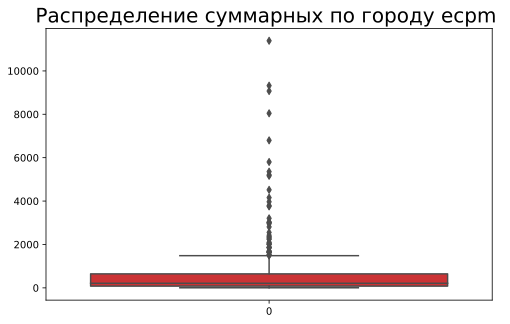

In [158]:
sns.boxplot(data=df_rv_by_city_sum.ecpm, palette='Set1')
plt.title('Распределение суммарных по городу ecpm ', fontsize=20)

In [159]:
df_rv_by_city_sum.ecpm.describe()

count      454.000000
mean       627.604114
std       1218.373226
min          4.074518
25%         80.640000
50%        211.700000
75%        643.971302
max      11389.241398
Name: ecpm, dtype: float64

No handles with labels found to put in legend.


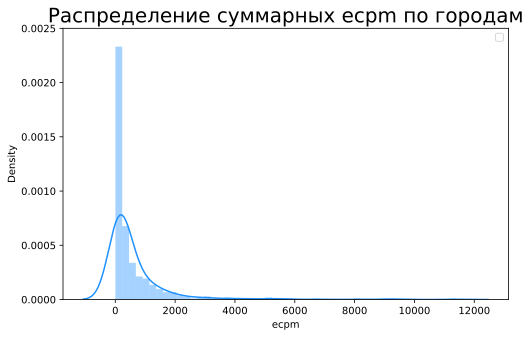

In [164]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df_rv_by_city_sum.ecpm, color="dodgerblue")
plt.ylim(0, 0.0025)
plt.title('Распределение суммарных ecpm по городам', fontsize=20)
plt.legend()
plt.show()

#### Можем опять увидеть все те же города в топе: Rocky Mount, Tulsa, Spokane

In [165]:
df_rv_by_city_sum[['city', 'ecpm']].sort_values(by='ecpm', ascending=False).head(30)

,city,ecpm
191,Houston,11389.241398
273,Minneapolis,9319.597029
296,New York,9071.508242
312,Oklahoma City,8045.251414
88,Cleveland,6797.868033
367,Rocky Mount,5802.239408
199,Indianapolis,5355.869683
365,Rockford,5207.038645
93,Columbus,5164.140197
81,Cincinnati,4517.577529


### Средние ecpm по версиям os

In [166]:
df_rv_by_os = df_int.groupby('os_version', as_index=False).mean()
df_rv_by_os['ecpm'] = df_rv_by_os['revenue'] * 1000
df_rv_by_os.shape

(11, 13)

#### Здесь мы можем видеть такую же картину как и в рекламе формата int

Text(0.5, 1.0, 'Зависимость среднего ecpm (rv) от версии системы')

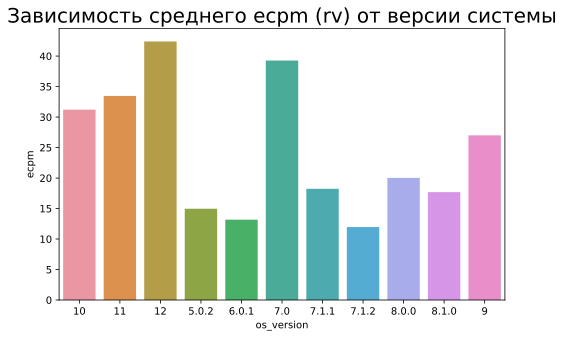

In [181]:
sns.barplot(x=df_rv_by_os.os_version.sort_values(ascending=True), y=df_rv_by_os.ecpm)
plt.title('Зависимость среднего ecpm (rv) от версии системы', fontsize=20)

Text(0.5, 1.0, 'Распределение средних ecpm по os')

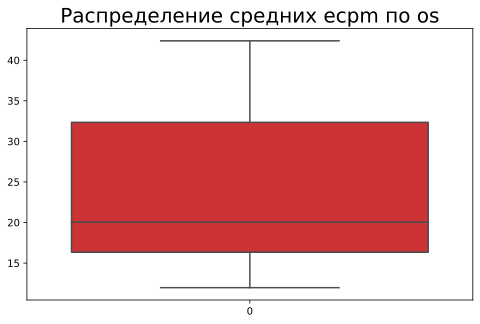

In [168]:
sns.boxplot(data=df_rv_by_os.ecpm, palette='Set1')
plt.title('Распределение средних ecpm по os', fontsize=20)

### Суммарные ecpm по версии os

In [169]:
df_rv_by_os_sum = df_rv.groupby('os_version', as_index=False).sum()
df_rv_by_os_sum['ecpm'] = df_rv_by_os_sum['revenue'] * 1000
df_rv_by_os_sum.shape

(10, 13)

#### Картина суммарного ecpm видна такая же картина как и в двух предидущих видах рекламы

Text(0.5, 1.0, 'Зависимость суммарного ecpm от версии системы')

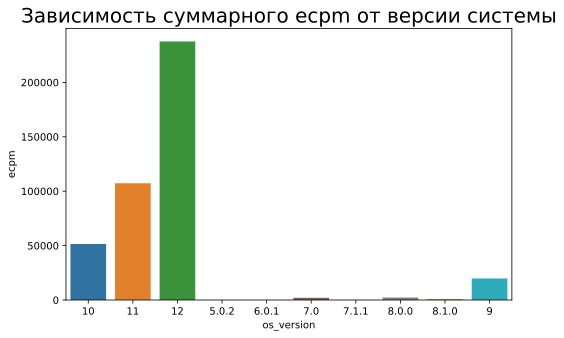

In [170]:
sns.barplot(x=df_rv_by_os_sum.os_version.sort_values(ascending=True), y=df_rv_by_os_sum.ecpm)
plt.title('Зависимость суммарного ecpm от версии системы', fontsize=20)

# Выводы:

### 1) Распределение средних ecpm по юзерам не имеют ничего необычного: всплеск около 0 и длинный хвост.
### Однако для формата rv имеется небольшой выброс для значения 211.7

### 2) Анализируя среднии ecpm по городам я обнаружил, что есть два города La Crosse и Rocky Mount имеющие население всего в 50 тыс. человек. Однако они находятся в топ 10 по всем 3-м видам рекламы.

### 3) Суммарное ecpm по городам показало то, что есть такие города как Spokan, Tulsa и уже упомянутый выше Rocky Mount имеют доход сопоставимы или даже выше, чем у многих мегаполисов

### 4) При анализе средних ecpm по версиям os можно заметить то, что при показе рекламы типа int и rv пользователи с 7 версией os приносят в среднем примерно в 3 раза больше прибыли, чем при рекламе типа banner

### 5) Суммарное ecpm по версиям os: наибольшую прибыль приносят 9, 10, 11 и 12 версии, что прямо пропорционально количеству пользователей этими os.